In [25]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale #cause SVM get affected very much if data is not scaled
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
df = pd.read_csv("data.csv")

In [26]:
X = df.drop('result', axis=1)
y = df['result']

Scaling is very essential in SVM cause the performance gets too bad if we didn't scale the data

In [27]:
X_train, X_test , y_train , y_test = train_test_split(X,y,random_state=22)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [28]:
clf_svm = SVC(random_state=22)
clf_svm.fit(X_train_scaled , y_train)

SVC(random_state=22)

Let's See what if we didn't do cross validation what the performance will be

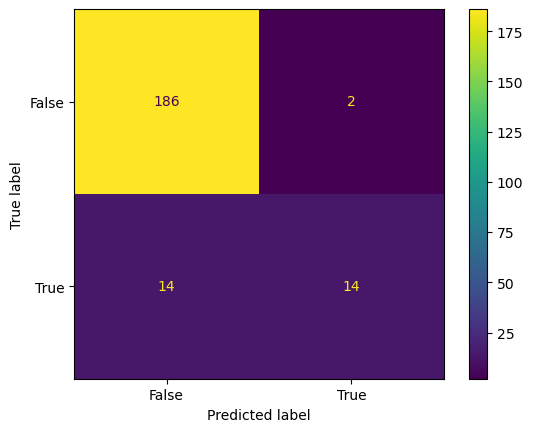

In [29]:
y_predicted = clf_svm.predict(X_test_scaled)
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

#
SVM classified 92.6% of the test data correctly so this is good but let's see with GridSearchCV() to optimize C and gamma

In [33]:
#we include default values for gamma and C which are scale and 1
param_grid = [
    {'C' : [0.5,1,10,100] , 
    'gamma' : ['scale',1,0.1,0.01,0.001,0.0001],
    'kernel' : ['rbf']},
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv = 5,
    scoring = 'accuracy',
    verbose = 0 #setting it to 2 will let you see the steps of GridSearch
)
optimal_params.fit(X_train_scaled,y_train)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


Now We will do exactly what we did before but with the best params after GridSearchCV()

In [34]:
clf_svm = SVC(random_state=22 , C=10 , gamma=0.1)
clf_svm.fit(X_train_scaled,y_train)

SVC(C=10, gamma=0.1, random_state=22)

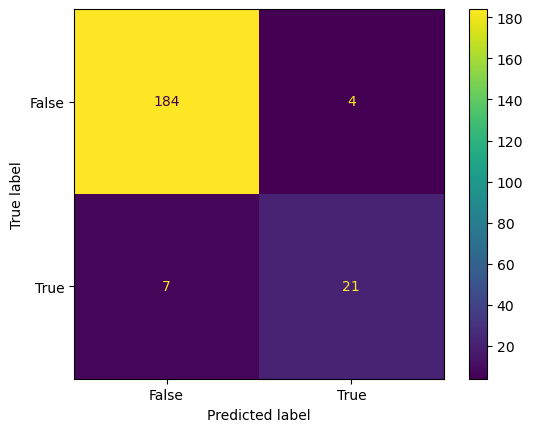

In [35]:
y_predicted = clf_svm.predict(X_test_scaled)
confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

So it is a little bit better 94.9% of test data are classified right and in most cases optimization does not help that much with svm